# Context

Задача определить зависимость между выживаемостью пассажиров, какие факторы имели наибольшее влияние. Выжившие определены как 0 или 1, где 0 - не выжили, 1- выжили. Параметр SibSp показывает количество родственников, ParCh - количество детей или родителей, Embarked - сокращенное место посадки пассажира.

Импортируем модули

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data quality assessment

Загружаем данные

In [2]:
data = pd.read_csv("train.csv", index_col="PassengerId", parse_dates=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Основная информация о количестве данных

In [3]:
print('data shape: ', data.shape)

data shape:  (100000, 11)


Проверяем данные на наличие пустых ячеек в колонках. Таким образом можно проверить качество данных, нет ли там ошибки

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


Предварительно проводим работу с данными.
Определяем данные, которые имеют значение в данной выборке.

У нас обнаружились следующие пустые ячейки:

In [5]:
data['Sex'].isnull().sum()

0

In [6]:
data['Age'].isnull().sum()

3292

In [7]:
data['Pclass'].isnull().sum()

0

In [8]:
data['Fare'].isnull().sum()

134

In [9]:
data['Embarked'].isnull().sum()

250

In [10]:
data['Cabin'].isnull().sum()

67866

Заполняем пропуски в колонке возраст медианными значениями

In [11]:
data['Age']=data['Age'].fillna(data['Age'].median())
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,39.00,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,39.00,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Создадим новую таблицу, в которой удалим ненужные значения :

In [12]:
useless_columns = ['Ticket', 'Cabin', 'Fare']
data_clean = data.drop(columns=useless_columns)
data_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,,
0,1,1,"Oconnor, Frankie",male,39.00,2,0,S
1,0,3,"Bryan, Drew",male,39.00,0,0,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,S
3,0,3,"Kramer, James",male,19.00,0,0,S
4,1,3,"Bond, Michael",male,25.00,0,0,S
...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,C
99996,0,2,"Brown, Herman",male,66.00,0,0,S
99997,0,3,"Childress, Charles",male,37.00,0,0,S


# Data exploration

Визуализация данных.
Определим сколько выжило  из общего количества пассажиров.

In [13]:
data_clean.Survived.value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Выжившие пассажиры')

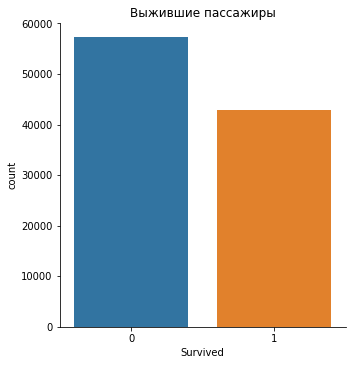

In [14]:
sns.catplot(x='Survived', data=data_clean, kind='count')
plt.title("Выжившие пассажиры")

Выжило меньше,чем погибло

Определим сколько всего было мужчин и женщин

In [15]:
data_clean.Sex.value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Соотношение пассажиров по полу')

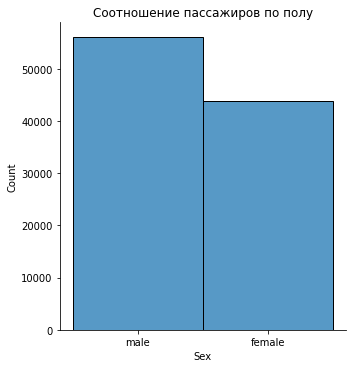

In [16]:
sns.displot(data_clean['Sex'])
plt.title("Соотношение пассажиров по полу")

Из этой гистограммы понятно, что большинство пассажиров - мужчины.
Проверим, соотношение спасенных мужчин и женщин 

Text(0.5, 1.0, 'Соотношение пассажиров по возрасту')

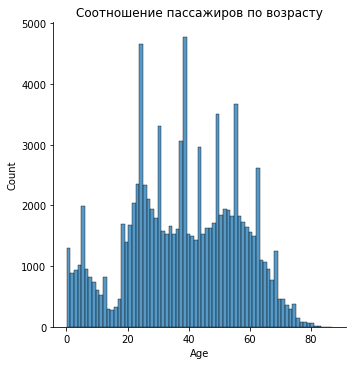

In [17]:
sns.displot(data_clean['Age'])
plt.title("Соотношение пассажиров по возрасту")

Больше всего было пассажиров от 20 до 40 лет

Text(0.5, 1.0, 'Зависимость выживших от пола')

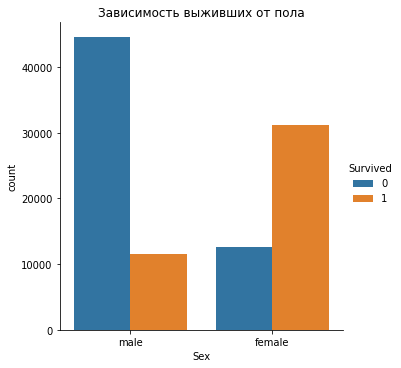

In [18]:
sns.catplot(x='Sex', data=data_clean, hue='Survived', kind='count')
plt.title("Зависимость выживших от пола")

Больше всего спасенных были женщинами.

Определим соотношение пассажиров в разных классах 

Text(0.5, 1.0, 'Распределение пассажиров по классу')

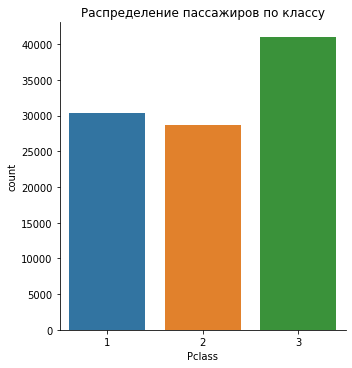

In [19]:
sns.catplot(x='Pclass', data=data_clean, kind='count')
plt.title("Распределение пассажиров по классу")

Большинство пассажиров ехало в 3 классе

Определим, сколько пассажиров какого пола ехало в каждом классе

Text(0.5, 1.0, 'Распределение пассажиров по полу в каждом классе')

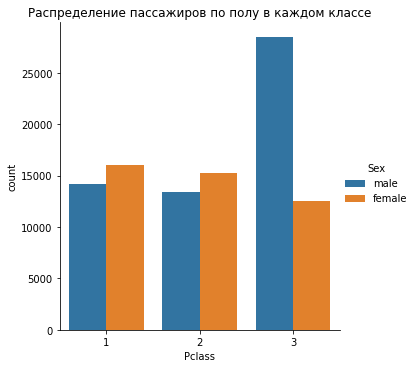

In [20]:
sns.catplot(x='Pclass', data=data_clean, hue='Sex', kind='count')
plt.title("Распределение пассажиров по полу в каждом классе")

Большинство мужчин ехало в 3 классе

Построим зависимость спасенных людей от  класса, в котором они ехали 

Text(0.5, 1.0, 'Распределение выживших по классам')

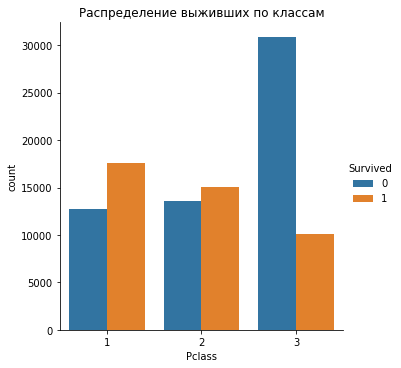

In [21]:
sns.catplot(x='Pclass', data=data_clean, hue='Survived', kind='count')
plt.title("Распределение выживших по классам")

Меньше всего выживших было среди пассажиров-мужчин 3 класса

Определим соотношение выживших по полу и классу

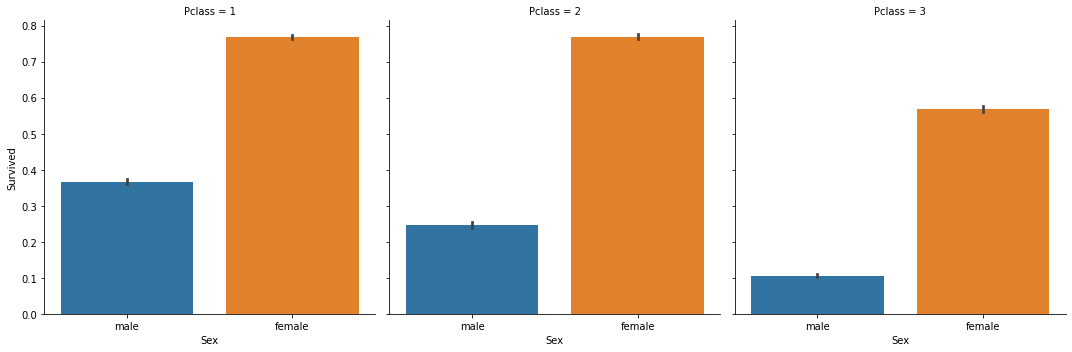

In [22]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=data_clean, kind='bar')

Меньше всего спасенных было в 3 классе

Определим, сколько пассажиров в каждом классе было в зависимости от места посадки

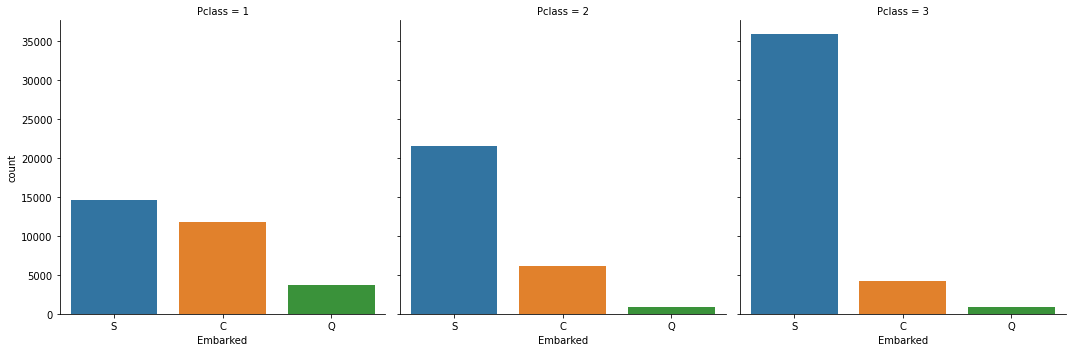

In [23]:
sns.catplot(x='Embarked', col='Pclass', data=data_clean, kind='count')

Большинство пассажиров было из пункта S

Определим, сколько выжило

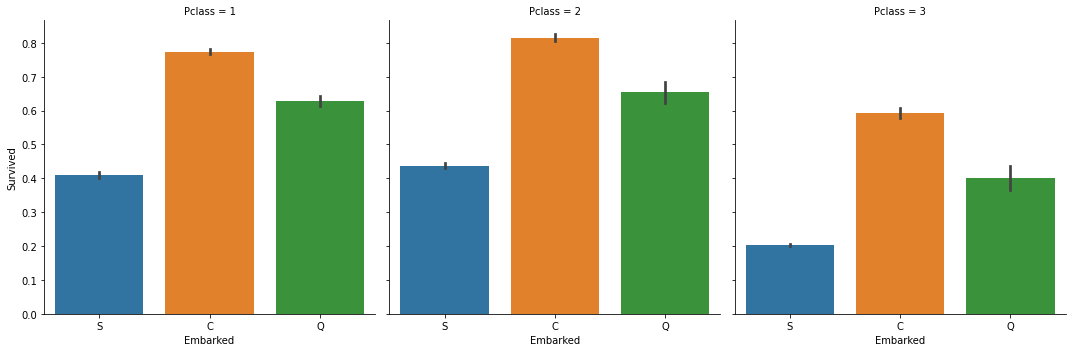

In [24]:
sns.catplot(x='Embarked', y='Survived', col='Pclass', data=data_clean, kind='bar')

Большинство выживших было из пункта C

Построим распределение спасенных в зависимости от пола и возраста:

Text(0.5, 1.0, 'Распределение выживших по возрасту и полу')

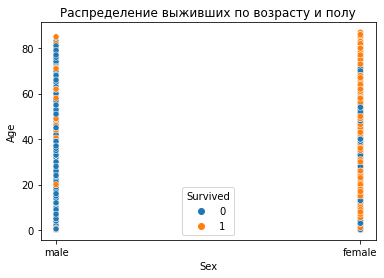

In [25]:
sns.scatterplot(x=data_clean['Sex'], y=data_clean['Age'], hue=data_clean['Survived'])
plt.title("Распределение выживших по возрасту и полу")

Из этого распределения можно сделать вывод, что зависимости спасенных от возраста нет.

Определим, насколько выживаемость зависит от количества членов семьи (признак SibSp)

Text(0.5, 1.0, 'Зависимость выживаемости от наличия родных, спутника жизни')

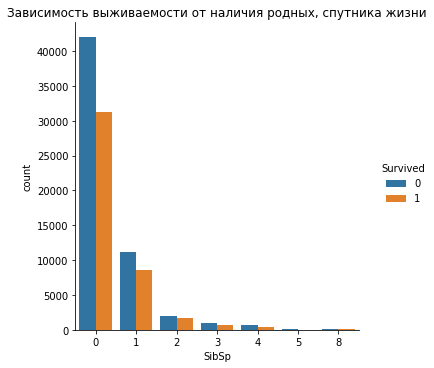

In [26]:
sns.catplot(x ='SibSp',  data=data_clean, hue='Survived', kind='count')
plt.title("Зависимость выживаемости от наличия родных, спутника жизни")

Определим, насколько выживаемость зависит от наличия родителей или детей (признак Parch)

Text(0.5, 1.0, 'Зависимость выживания от наличия родителей, детей')

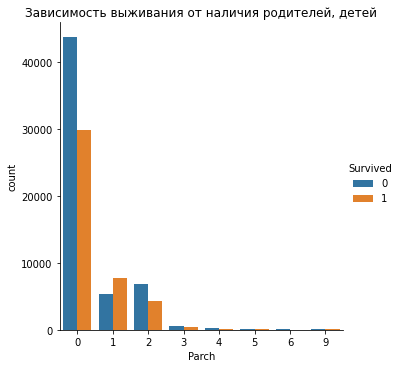

In [27]:
sns.catplot(x= 'Parch', data=data_clean, hue='Survived', kind='count')
plt.title("Зависимость выживания от наличия родителей, детей")

Наличие детей и родственников влияет на выживаемость. Создадим новую колонку в data frame

In [28]:
data_clean['Family_size'] = data_clean['Parch'] + data_clean['SibSp']
data_clean.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Family_size
PassengerId,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,39.00,2,0,S,2
1,0,3,"Bryan, Drew",male,39.00,0,0,S,0
2,0,3,"Owens, Kenneth",male,0.33,1,2,S,3
3,0,3,"Kramer, James",male,19.00,0,0,S,0
4,1,3,"Bond, Michael",male,25.00,0,0,S,0


Новый признак помогает лучше отделить случаи, в которых люди выживали

Text(0.5, 1.0, 'Зависимость выживших от размера семьи')

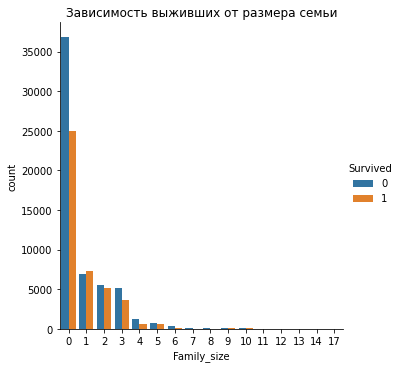

In [29]:
sns.catplot(x ='Family_size', data=data_clean, hue='Survived', kind='count')
plt.title('Зависимость выживших от размера семьи')

Одинокие выживали реже.

Проверим корреляцию между всеми исследуемыми показателями. Для этого в  таблице data_clean заменим пол и место посадки цифровыми значениями 

In [30]:
data_clean['Sex'].where(~(data_clean.Sex != 'male'), other=0, inplace=True)
data_clean['Sex'].where(~(data_clean.Sex == 'male'), other=1, inplace=True)
data_clean['Embarked'].where(~(data_clean.Embarked == 'S'), other=1, inplace=True)
data_clean['Embarked'].where(~(data_clean.Embarked == 'C'), other=2, inplace=True)
data_clean['Embarked'].where(~(data_clean.Embarked == 'Q'), other=3, inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,39.00,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,39.00,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       100000 non-null  float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


Чтобы было удобнее работать с данными, изменим в колонках 'Sex' и 'Embarked' тип данных объект (object) на цифровое значение int

In [32]:
data_clean = data_clean.astype({"Sex": "Int64"})
data_clean = data_clean.astype({"Embarked": "Int64"})
data_clean.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Family_size
PassengerId,,,,,,,,,
0,1,1,"Oconnor, Frankie",1,39.00,2,0,1,2
1,0,3,"Bryan, Drew",1,39.00,0,0,1,0
2,0,3,"Owens, Kenneth",1,0.33,1,2,1,3
3,0,3,"Kramer, James",1,19.00,0,0,1,0
4,1,3,"Bond, Michael",1,25.00,0,0,1,0


Построим матрицу корреляции

In [33]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.289723,0.102147,-0.007587,0.023352,0.187534
Pclass,-0.289723,1.000000,-0.254808,-0.051436,-0.041848,-0.417354
Age,0.102147,-0.254808,1.000000,-0.110775,-0.123686,0.107272
SibSp,-0.007587,-0.051436,-0.110775,1.000000,0.213126,0.059358
Parch,0.023352,-0.041848,-0.123686,0.213126,1.000000,0.061443
Fare,0.187534,-0.417354,0.107272,0.059358,0.061443,1.000000


Построим тепловую карту корреляции

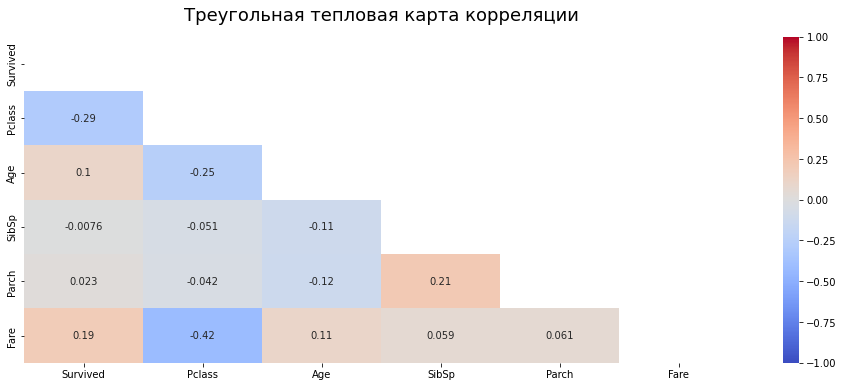

In [34]:
plt.figure(figsize=(16, 6)) 
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool_)) 
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm') 
heatmap.set_title('Треугольная тепловая карта корреляции', fontdict={'fontsize':18}, pad=16);

Количество выживших очень слабо коррелирует с классом каюты, слабо коррелирует с местом посадки, и имеет среднюю корреляцию с полом пассажира. Значит явной связи между данными показателями и выживаемостью нет. 

# Summary

Из всего этого можно сделать вывод, что среди общего числа пассажиров выживших было меньше, чем погибших, чаще всего выживали женщины, пассажиры первого класса, отправившиеся из пункта C, имевшие семьи. Одинокие, мужчины, пассажиры 3 класса из других городов выживали реже. 